Import library


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

Make datasets


In [3]:
X, y = datasets.make_classification(n_samples=50, n_features=2, n_informative = 2,n_redundant = 0 ,n_classes=2, n_clusters_per_class=1,class_sep=1.5,shuffle=False,random_state=12346)

visua dataset


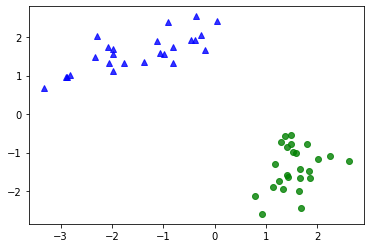

In [4]:
X0 = X[y == 0,:]
X1 = X[y == 1,:]
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)

In [5]:
y=np.where(y==0,-1,1)
Xbar =  np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
y= y.reshape(1,50)
Xbar =Xbar.T

In [6]:
def hypothesis(w,X):
     return np.sign(np.dot(w.T, X))
class pla():
  def __init__(self, X, y, w_init):
    self.X = X
    self.y = y
    self.w_init = w_init
  def has_converged(self,w):
    return np.array_equal(hypothesis(w,self.X),self.y)
  def fit(self):
    w = [self.w_init]
    N = self.X.shape[1]
    while True:
      for i in range(N):
        xi = self.X[:,i].reshape(3,1)
        yi = self.y[0,i]
        if (hypothesis(w[-1],xi)[0] != yi):
          w_new = w[-1] + yi*xi
          w.append(w_new)
      if pla.has_converged(self,w[-1]) :
          break
    return w





In [7]:
w_init = np.random.rand(Xbar.shape[0],1)
Perceptron = pla(Xbar,y,w_init)
w = Perceptron.fit()

In [8]:
x11 = Xbar[1,:]
def display(w):
  for i in range(len(w)):
    a = w[i][0]
    x1 = w[i][1]
    x2 = w[i][2]
    plt.plot(x11,(-x1*x11-a)/x2,color='red',linewidth =2, label = 'Predict')
    plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
    plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)
    plt.show()

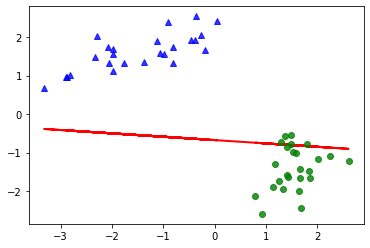

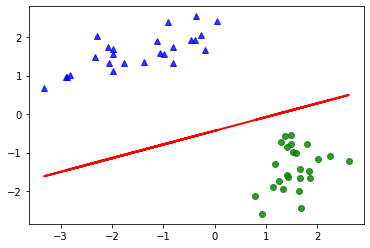

In [10]:
display(w)

Change w_init -> other results

In [11]:
w_init=np.array([1,1,1]).reshape(3,1)

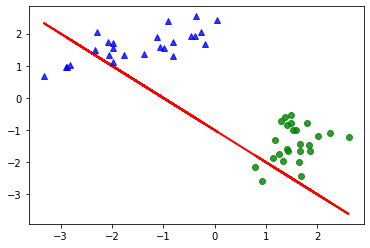

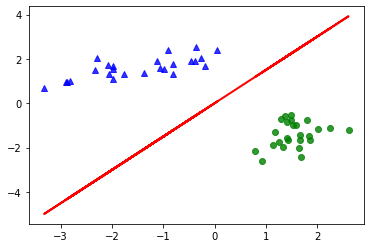

In [12]:
Perceptron = pla(Xbar,y,w_init)
w = Perceptron.fit()
display(w)

Use sklearn

In [13]:
from sklearn import linear_model 
model = linear_model.Perceptron()
y=y.reshape(50,1)
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [18]:
model.coef_

array([[ 2.60999856, -1.21647924]])

In [19]:
model.intercept_

array([1.])

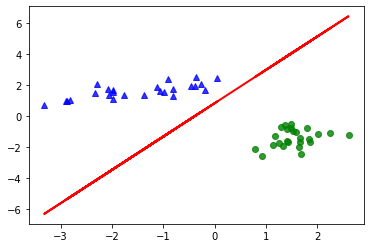

In [20]:
  b = model.intercept_
  x1 = model.coef_[0,0]
  x2 = model.coef_[0,1]
  plt.plot(x11,(-x1*x11-b)/x2,color='red',linewidth =2, label = 'Predict')
  plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
  plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)
  plt.show()

XOR 

In [ ]:
X_xnor = np.array([[0,0],[1,1],[1,0],[0,1]])
y_xnor = np.array([0,0,1,1])

In [ ]:
for i in range(4):
  if(y_xnor[i] == 0):
    y_xnor[i] = -1
X_xnor =  np.concatenate((np.ones((X_xnor.shape[0],1)), X_xnor), axis = 1)
y_xnor= y_xnor.reshape(1,4)
X_xnor =X_xnor.T

In [ ]:
w_init = np.random.rand(X_xnor.shape[0],1)
Perceptron = pla(X_xnor,y_xnor,w_init)
w = Perceptron.fit() ## lặp vô hạn 

KeyboardInterrupt: ignored